#### Battery Remaining Useful Life Prediction using ANN

#### Attribute information

https://www.kaggle.com/datasets/ignaciovinuales/battery-remaining-useful-life-rul

##### Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

##### Loading the dataset

In [2]:
data = pd.read_csv("Battery_RUL.csv")
data.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cycle_Index,15064.0,556.155005,322.378480,1.000,271.000000,560.000000,833.0000,1134.000
Discharge Time (s),15064.0,4581.273960,33144.012077,8.690,1169.310000,1557.250000,1908.0000,958320.370
Decrement 3.6-3.4V (s),15064.0,1239.784672,15039.589269,-397645.908,319.600000,439.239471,600.0000,406703.768
Max. Voltage Dischar. (V),15064.0,3.908176,0.091003,3.043,3.846000,3.906000,3.9720,4.363
Min. Voltage Charg. (V),15064.0,3.577904,0.123695,3.022,3.488000,3.574000,3.6630,4.379
Time at 4.15V (s),15064.0,3768.336171,9129.552477,-113.584,1828.884179,2930.203500,4088.3265,245101.117
Time constant current (s),15064.0,5461.266970,25155.845202,5.980,2564.310000,3824.260000,5012.3500,880728.100
Charging time (s),15064.0,10066.496204,26415.354121,5.980,7841.922500,8320.415000,8763.2825,880728.100
RUL,15064.0,554.194172,322.434514,0.000,277.000000,551.000000,839.0000,1133.000


In [5]:
data.shape

(15064, 9)

##### Checking null values

In [6]:
data.isnull().mean()*100

Cycle_Index                  0.0
Discharge Time (s)           0.0
Decrement 3.6-3.4V (s)       0.0
Max. Voltage Dischar. (V)    0.0
Min. Voltage Charg. (V)      0.0
Time at 4.15V (s)            0.0
Time constant current (s)    0.0
Charging time (s)            0.0
RUL                          0.0
dtype: float64

#### Dataset is free of null values.

#### Checking for duplicated values

In [7]:
data.duplicated().sum()

0

### Explaratory Data analysis

#### Histograms

In [8]:
univariate_list = ['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)',
       'RUL']

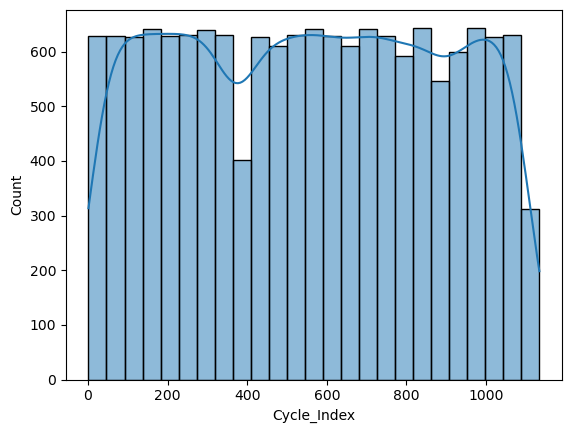

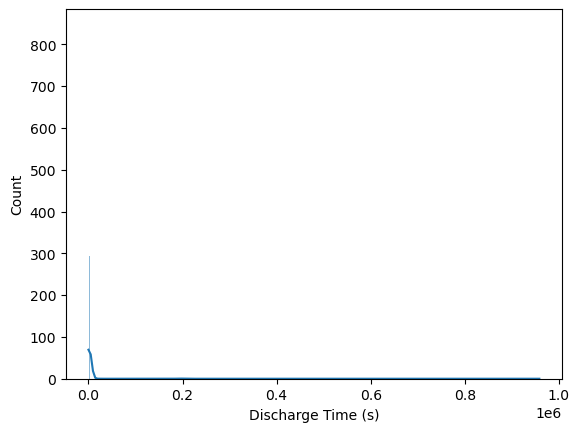

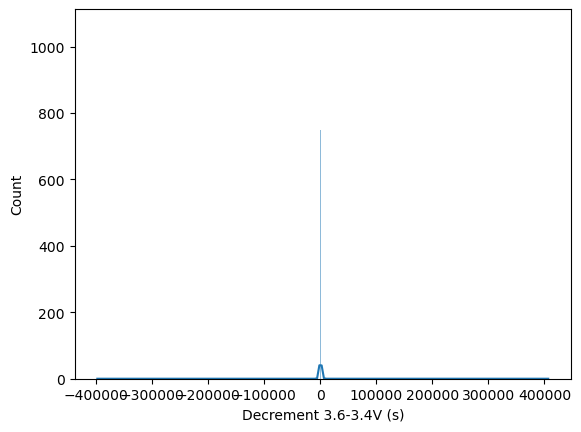

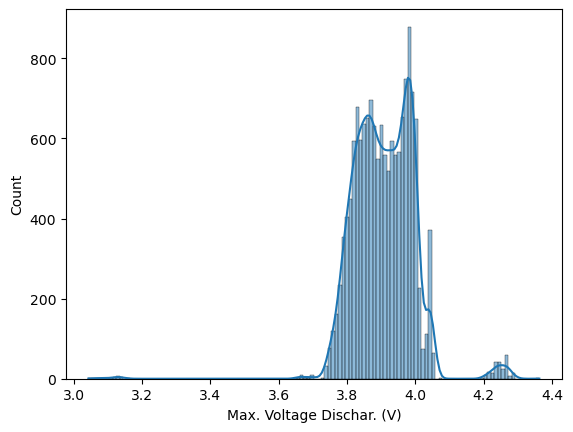

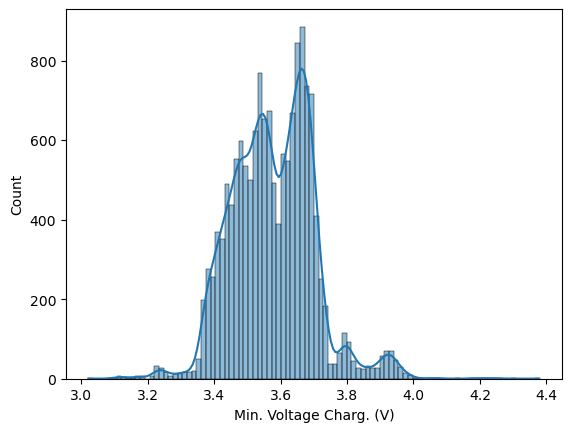

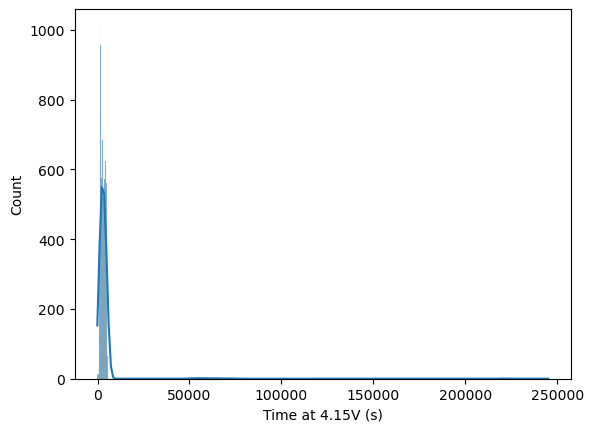

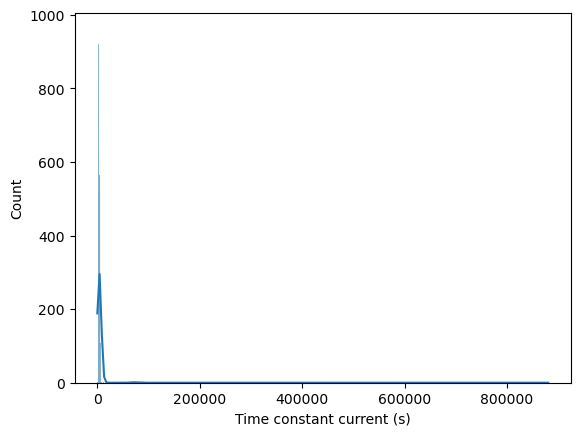

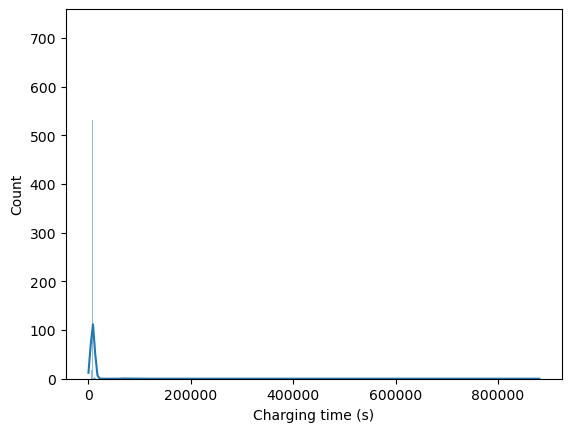

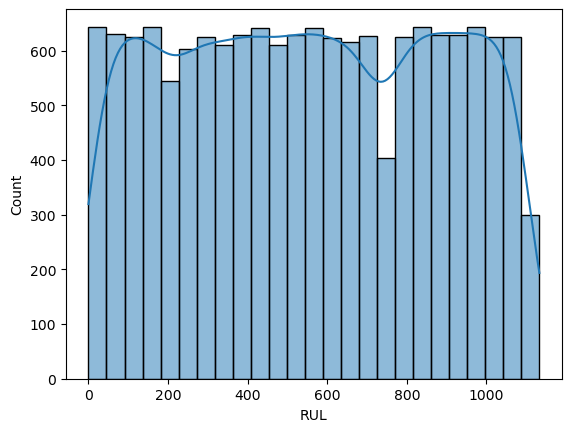

In [9]:
for i in univariate_list:
    sns.histplot(data=data,x=data[i], kde = True)
    plt.show();

#### Box plots

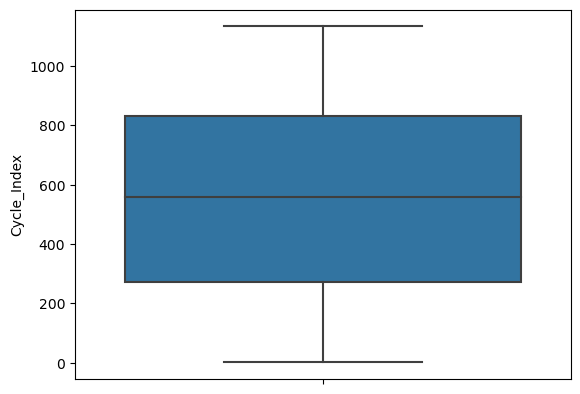

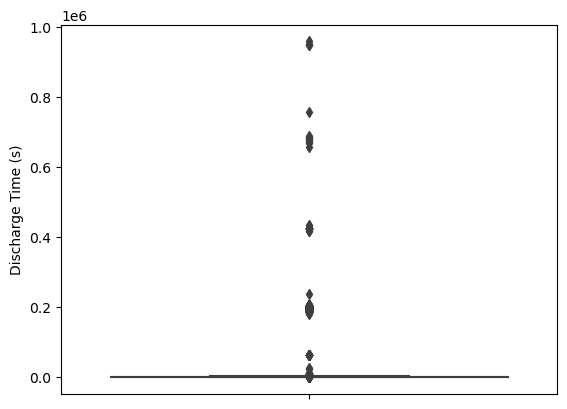

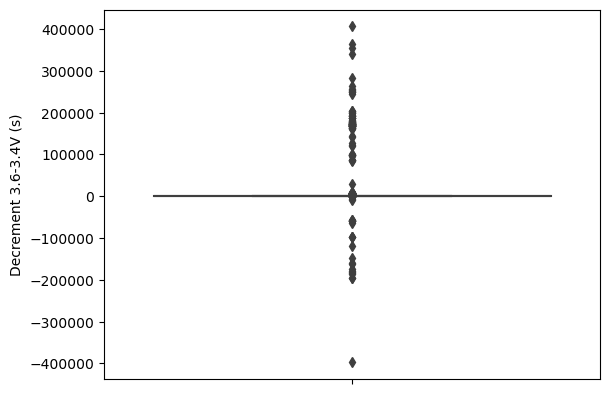

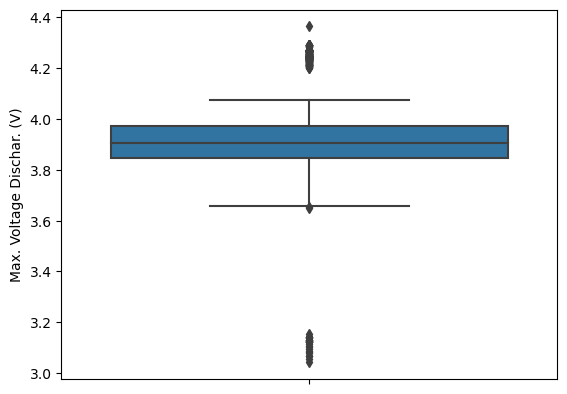

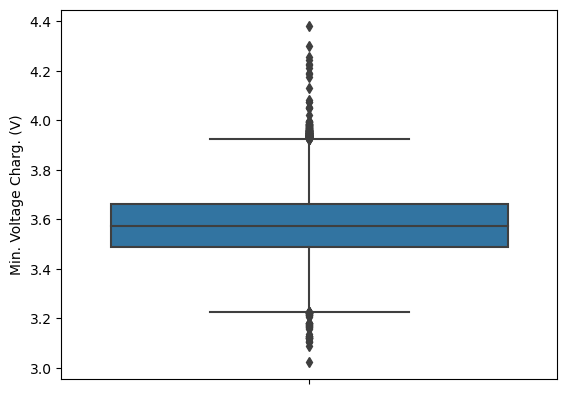

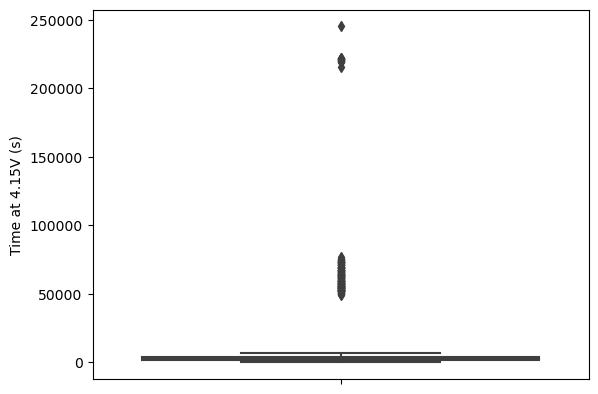

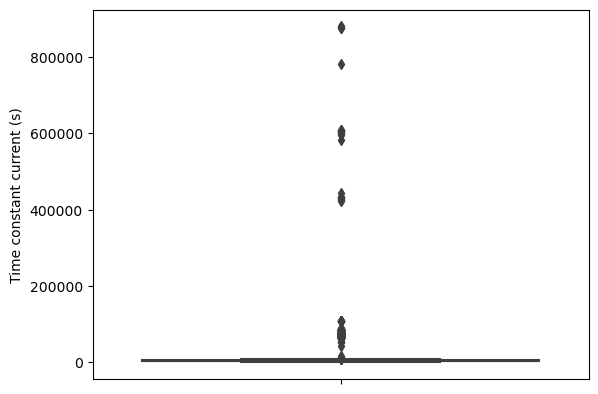

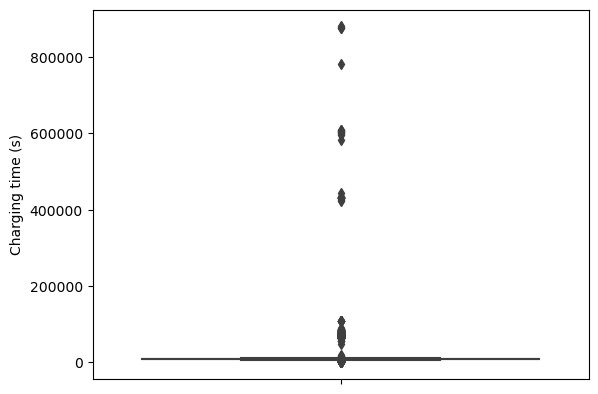

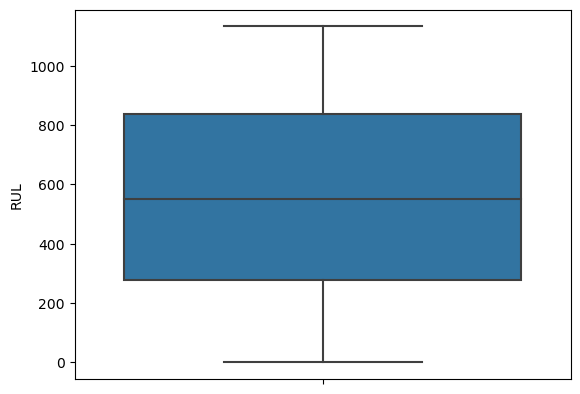

In [10]:
for i in data.columns:
    sns.boxplot(y=data[i])
    plt.show();

#### Treating outliers using IQR method

In [11]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col, [75,25])
    IQR = Q3- Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL, LL

In [12]:
for i in data.columns:
    UL,LL = outlier_limit(data[i])
    data[i] = np.where((data[i]>UL)|(data[i]<LL), np.nan, data[i])

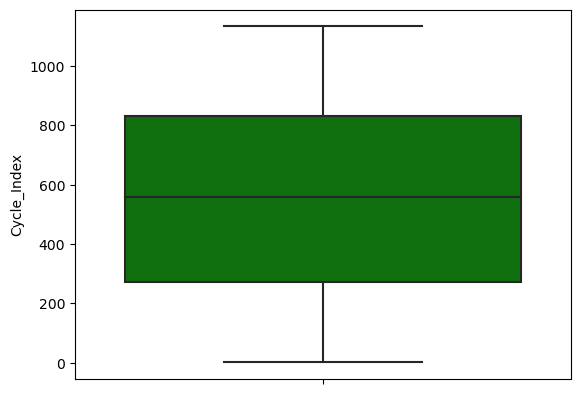

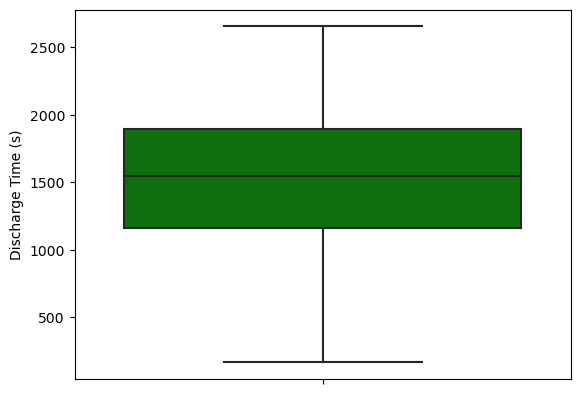

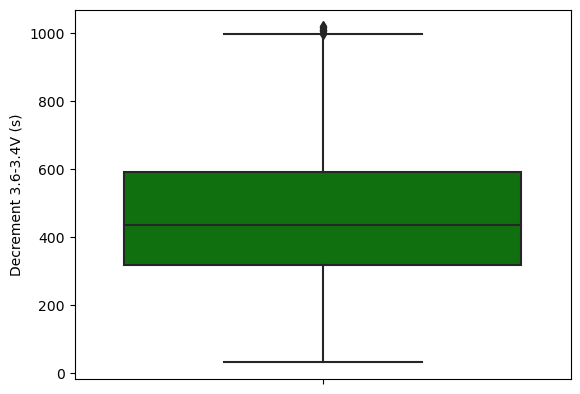

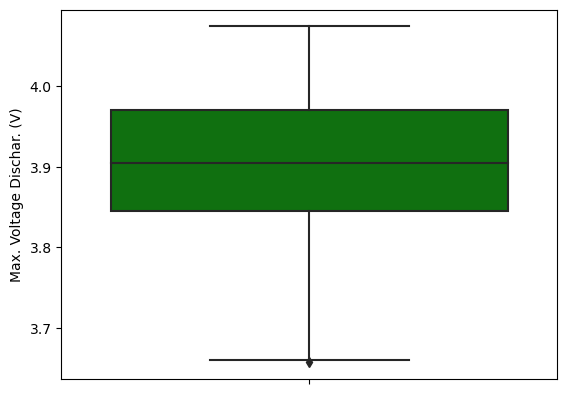

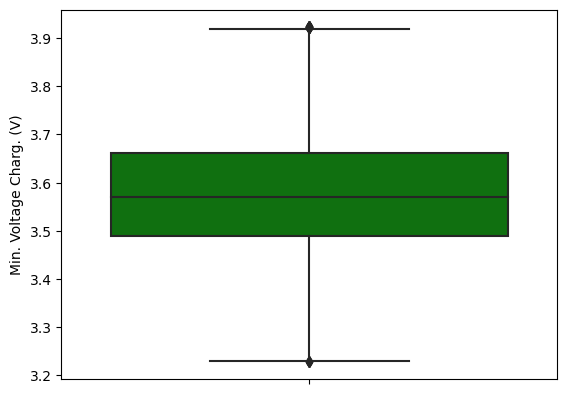

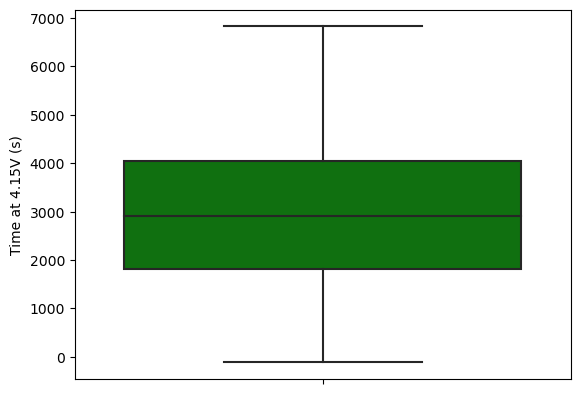

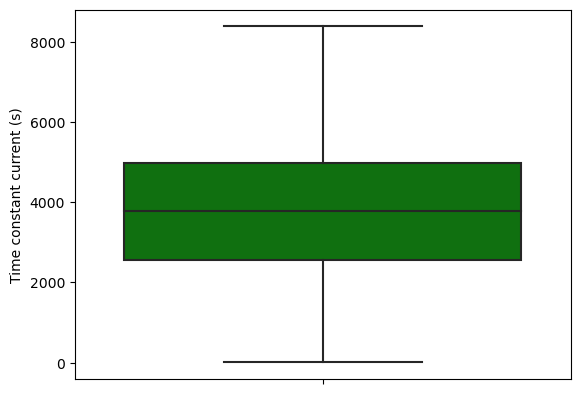

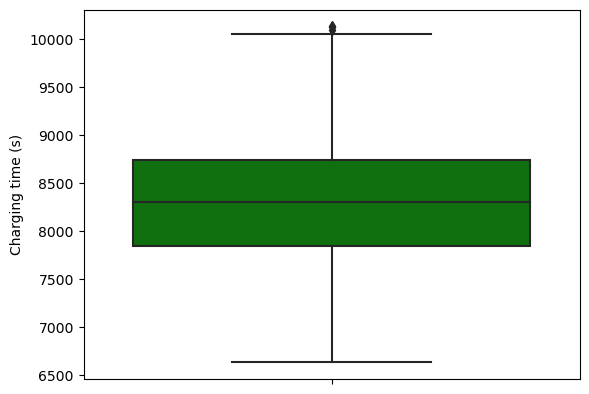

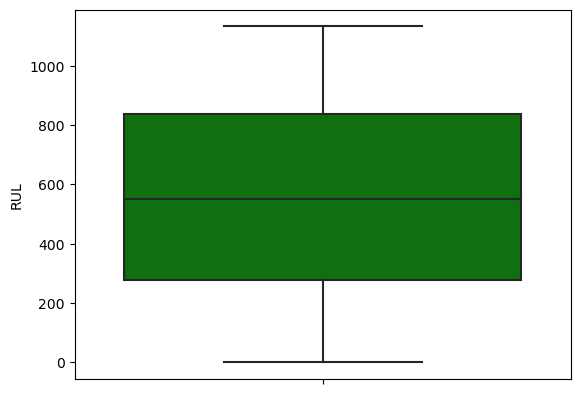

In [13]:
for i in data.columns:
    sns.boxplot(y=data[i], color="green")
    plt.show();

#### We have treated the outliers. Lets remove the null values.

In [14]:
data.dropna(inplace=True)

In [15]:
data.shape

(14445, 9)

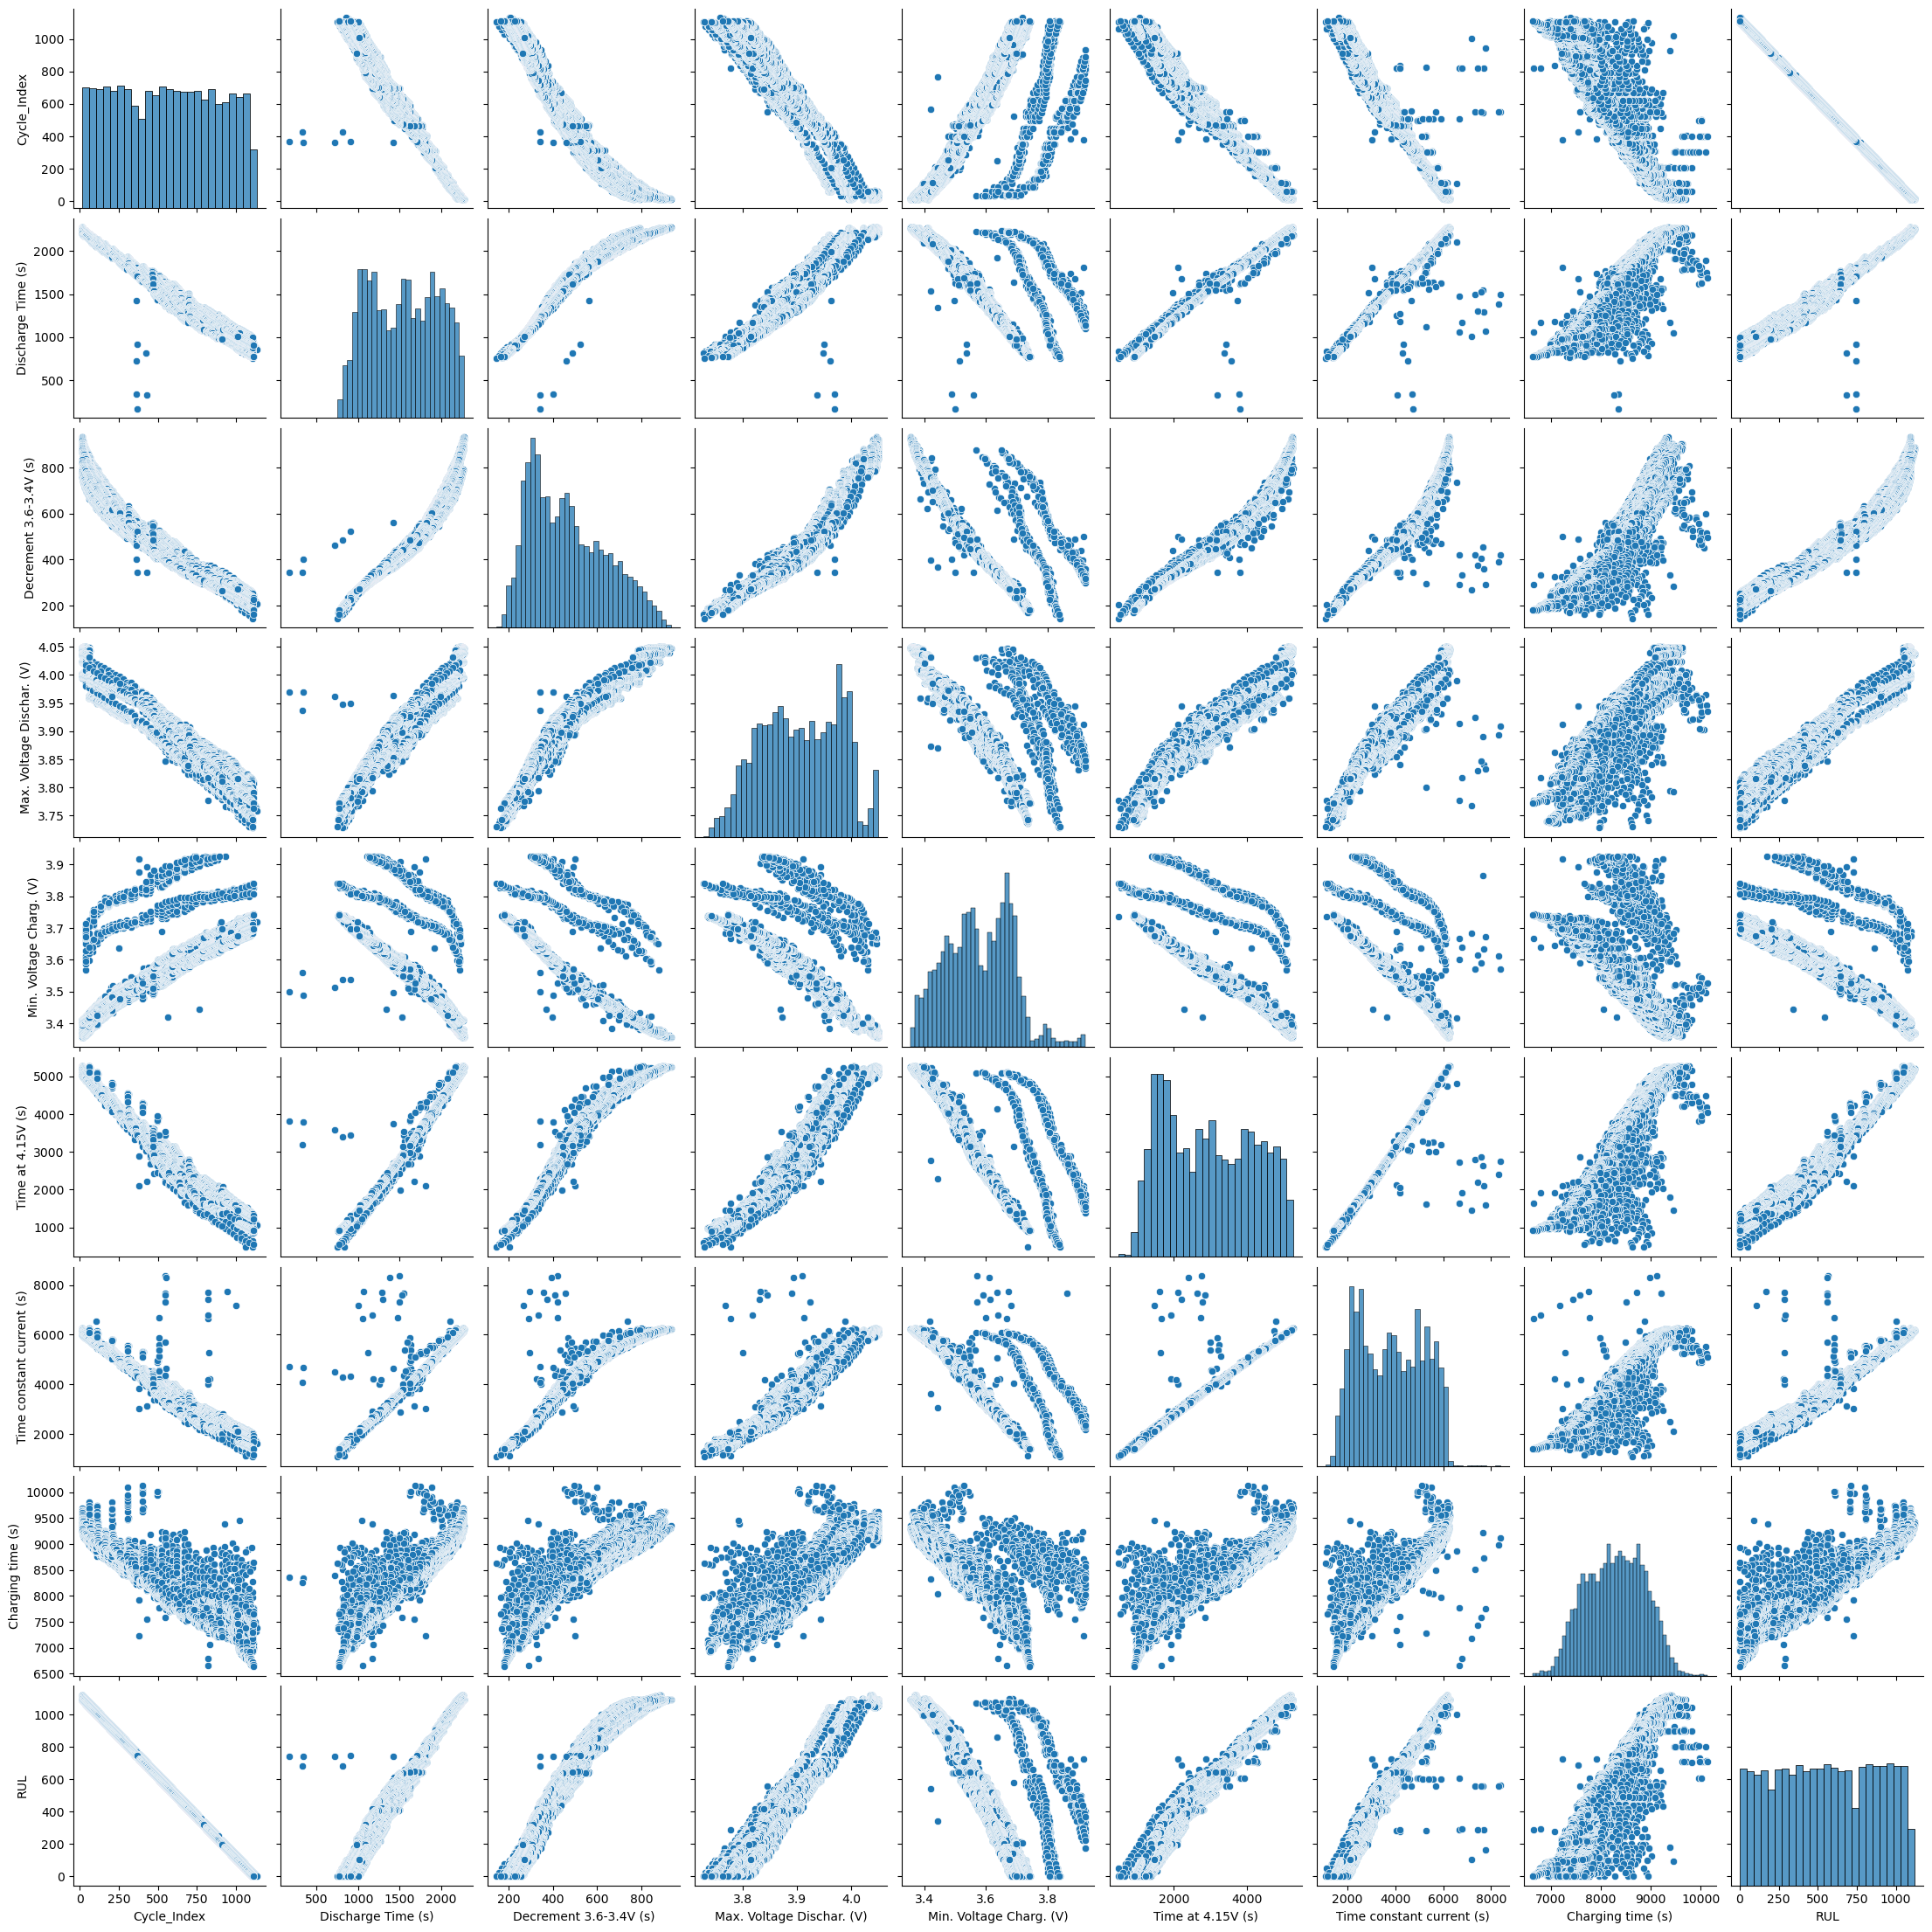

In [16]:
sns.pairplot(data);

##### Correlation matrix

<Axes: >

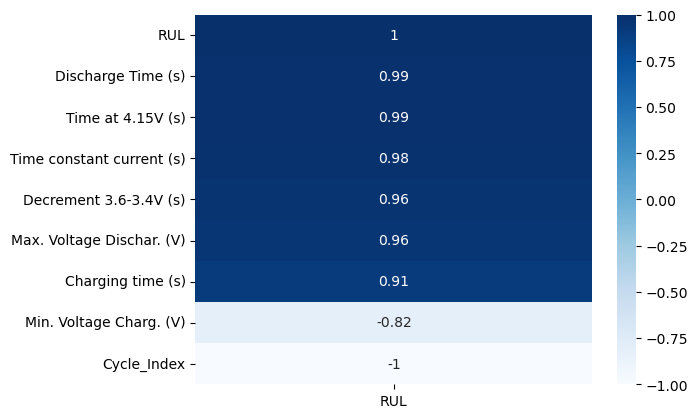

In [17]:
sns.heatmap(data.corr()[["RUL"]].sort_values(by="RUL", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Blues")

#### We can see that except "Cycle_Index" & 'Min. Voltage Charg. (V)' all other features are highly correlated with RUL.

#### Feature selection

In [18]:
x = data[['Discharge Time (s)', 'Decrement 3.6-3.4V (s)','Max. Voltage Dischar. (V)','Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)']].values

In [19]:
x.shape

(14445, 6)

In [20]:
y = data["RUL"].values

In [21]:
y.shape

(14445,)

##### Splitting the data into training and testing data

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

##### Scaling the data

In [23]:
sc = StandardScaler()

In [24]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Setting the random seed for output reproducibility

In [25]:
tf.random.set_seed(42)

#### Defining the model architecture

In [26]:
model = keras.Sequential()

In [27]:
model.add(Dense(64, activation='relu', input_dim = x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

#### Compiling the model

In [28]:
model.compile(optimizer='adam', loss='mean_squared_error')

#### Define early stopping criteria

In [29]:
early_stopping = EarlyStopping(
                monitor='val_loss',
                patience = 50,
                verbose=1
)

#### Train the model with early stopping

In [30]:
history = model.fit(x_train, y_train, batch_size=32, epochs=1000,callbacks=[early_stopping], validation_data=(x_test, y_test))

Epoch 1/1000
362/362 [==============================] - 1s 2ms/step - loss: 230843.0625 - val_loss: 49386.1836
Epoch 2/1000
362/362 [==============================] - 1s 1ms/step - loss: 31241.7344 - val_loss: 12348.2393
Epoch 3/1000
362/362 [==============================] - 1s 1ms/step - loss: 12387.2246 - val_loss: 4486.4023
Epoch 4/1000
362/362 [==============================] - 1s 1ms/step - loss: 8569.2783 - val_loss: 3002.5801
Epoch 5/1000
362/362 [==============================] - 1s 1ms/step - loss: 8026.6411 - val_loss: 2582.4128
Epoch 6/1000
362/362 [==============================] - 1s 1ms/step - loss: 7629.1289 - val_loss: 2537.1226
Epoch 7/1000
362/362 [==============================] - 1s 1ms/step - loss: 7647.6758 - val_loss: 2351.5105
Epoch 8/1000
362/362 [==============================] - 1s 1ms/step - loss: 7257.1479 - val_loss: 2623.6982
Epoch 9/1000
362/362 [==============================] - 1s 1ms/step - loss: 7121.1860 - val_loss: 2324.8862
Epoch 10/1000
362/362 

362/362 [==============================] - 1s 1ms/step - loss: 6431.9717 - val_loss: 1676.3120
Epoch 77/1000
362/362 [==============================] - 1s 1ms/step - loss: 6207.6802 - val_loss: 1688.6295
Epoch 78/1000
362/362 [==============================] - 1s 1ms/step - loss: 6279.1206 - val_loss: 1740.2821
Epoch 79/1000
362/362 [==============================] - 1s 1ms/step - loss: 6302.5566 - val_loss: 1658.3342
Epoch 80/1000
362/362 [==============================] - 1s 1ms/step - loss: 6229.7202 - val_loss: 1644.9297
Epoch 81/1000
362/362 [==============================] - 1s 1ms/step - loss: 6110.5220 - val_loss: 1806.6669
Epoch 82/1000
362/362 [==============================] - 1s 1ms/step - loss: 6037.3521 - val_loss: 1749.6836
Epoch 83/1000
362/362 [==============================] - 1s 1ms/step - loss: 6208.6348 - val_loss: 1726.7576
Epoch 84/1000
362/362 [==============================] - 1s 1ms/step - loss: 6057.7495 - val_loss: 1620.8359
Epoch 85/1000
362/362 [==========

Epoch 151/1000
362/362 [==============================] - 1s 1ms/step - loss: 5508.6113 - val_loss: 1589.9474
Epoch 152/1000
362/362 [==============================] - 1s 1ms/step - loss: 5651.2993 - val_loss: 1476.9370
Epoch 153/1000
362/362 [==============================] - 1s 1ms/step - loss: 5498.3267 - val_loss: 1489.1855
Epoch 154/1000
362/362 [==============================] - 1s 1ms/step - loss: 5671.9795 - val_loss: 1704.2874
Epoch 155/1000
362/362 [==============================] - 1s 1ms/step - loss: 5712.9546 - val_loss: 1518.9374
Epoch 156/1000
362/362 [==============================] - 1s 1ms/step - loss: 5486.3418 - val_loss: 1571.4088
Epoch 157/1000
362/362 [==============================] - 1s 1ms/step - loss: 5602.0098 - val_loss: 1494.8964
Epoch 158/1000
362/362 [==============================] - 1s 2ms/step - loss: 5553.0532 - val_loss: 1568.6143
Epoch 159/1000
362/362 [==============================] - 1s 2ms/step - loss: 5555.0898 - val_loss: 1457.2142
Epoch 160/

362/362 [==============================] - 1s 1ms/step - loss: 5291.5972 - val_loss: 1565.9093
Epoch 226/1000
362/362 [==============================] - 1s 1ms/step - loss: 5434.6143 - val_loss: 1576.0906
Epoch 227/1000
362/362 [==============================] - 1s 1ms/step - loss: 5428.3965 - val_loss: 1417.0817
Epoch 228/1000
362/362 [==============================] - 1s 1ms/step - loss: 5265.0303 - val_loss: 1400.7808
Epoch 229/1000
362/362 [==============================] - 1s 1ms/step - loss: 5238.1694 - val_loss: 1364.7784
Epoch 230/1000
362/362 [==============================] - 1s 1ms/step - loss: 5430.8042 - val_loss: 1537.3661
Epoch 231/1000
362/362 [==============================] - 1s 1ms/step - loss: 5428.8301 - val_loss: 1432.5581
Epoch 232/1000
362/362 [==============================] - 1s 1ms/step - loss: 5293.3608 - val_loss: 1439.3768
Epoch 233/1000
362/362 [==============================] - 1s 1ms/step - loss: 5401.9229 - val_loss: 1352.6447
Epoch 234/1000
362/362 [=

362/362 [==============================] - 1s 1ms/step - loss: 5249.0576 - val_loss: 1334.9142
Epoch 300/1000
362/362 [==============================] - 1s 1ms/step - loss: 5255.2573 - val_loss: 1327.2069
Epoch 301/1000
362/362 [==============================] - 1s 1ms/step - loss: 5146.4756 - val_loss: 1310.3938
Epoch 302/1000
362/362 [==============================] - 1s 1ms/step - loss: 5208.1133 - val_loss: 1316.5406
Epoch 303/1000
362/362 [==============================] - 1s 1ms/step - loss: 5001.3037 - val_loss: 1297.7178
Epoch 304/1000
362/362 [==============================] - 1s 1ms/step - loss: 5111.9146 - val_loss: 1322.8678
Epoch 305/1000
362/362 [==============================] - 1s 1ms/step - loss: 5202.9517 - val_loss: 1316.8953
Epoch 306/1000
362/362 [==============================] - 1s 1ms/step - loss: 5251.0796 - val_loss: 1327.3147
Epoch 307/1000
362/362 [==============================] - 1s 1ms/step - loss: 5182.9814 - val_loss: 1285.6239
Epoch 308/1000
362/362 [=

362/362 [==============================] - 1s 1ms/step - loss: 5007.2749 - val_loss: 1249.4127
Epoch 374/1000
362/362 [==============================] - 1s 1ms/step - loss: 5073.2051 - val_loss: 1485.3126
Epoch 375/1000
362/362 [==============================] - 1s 1ms/step - loss: 4991.2139 - val_loss: 1253.1692
Epoch 376/1000
362/362 [==============================] - 1s 1ms/step - loss: 5063.3638 - val_loss: 1243.3663
Epoch 377/1000
362/362 [==============================] - 1s 2ms/step - loss: 5025.8335 - val_loss: 1200.9227
Epoch 378/1000
362/362 [==============================] - 1s 1ms/step - loss: 5020.2290 - val_loss: 1248.1670
Epoch 379/1000
362/362 [==============================] - 1s 1ms/step - loss: 4976.5073 - val_loss: 1311.3721
Epoch 380/1000
362/362 [==============================] - 1s 1ms/step - loss: 5068.6343 - val_loss: 1268.6652
Epoch 381/1000
362/362 [==============================] - 1s 1ms/step - loss: 5061.8125 - val_loss: 1478.9855
Epoch 382/1000
362/362 [=

362/362 [==============================] - 1s 1ms/step - loss: 4946.7114 - val_loss: 1251.9652
Epoch 448/1000
362/362 [==============================] - 1s 1ms/step - loss: 4989.8130 - val_loss: 1263.8276
Epoch 449/1000
362/362 [==============================] - 1s 1ms/step - loss: 4963.4321 - val_loss: 1283.0647
Epoch 450/1000
362/362 [==============================] - 1s 1ms/step - loss: 4965.4673 - val_loss: 1188.2346
Epoch 451/1000
362/362 [==============================] - 1s 1ms/step - loss: 4898.3101 - val_loss: 1165.8295
Epoch 452/1000
362/362 [==============================] - 1s 1ms/step - loss: 4842.6948 - val_loss: 1366.2706
Epoch 453/1000
362/362 [==============================] - 1s 1ms/step - loss: 4816.0879 - val_loss: 1266.2478
Epoch 454/1000
362/362 [==============================] - 1s 1ms/step - loss: 4907.4546 - val_loss: 1186.6010
Epoch 455/1000
362/362 [==============================] - 1s 1ms/step - loss: 4957.8291 - val_loss: 1175.1859
Epoch 456/1000
362/362 [=

362/362 [==============================] - 1s 1ms/step - loss: 4762.9863 - val_loss: 1137.7963
Epoch 522/1000
362/362 [==============================] - 1s 1ms/step - loss: 4770.4438 - val_loss: 1164.4009
Epoch 523/1000
362/362 [==============================] - 1s 1ms/step - loss: 4755.0039 - val_loss: 1189.6010
Epoch 524/1000
362/362 [==============================] - 1s 1ms/step - loss: 4825.0610 - val_loss: 1160.6531
Epoch 525/1000
362/362 [==============================] - 1s 1ms/step - loss: 4861.6758 - val_loss: 1293.6597
Epoch 526/1000
362/362 [==============================] - 1s 1ms/step - loss: 4916.8716 - val_loss: 1198.2418
Epoch 527/1000
362/362 [==============================] - 1s 1ms/step - loss: 4795.5093 - val_loss: 1187.1031
Epoch 528/1000
362/362 [==============================] - 1s 1ms/step - loss: 4865.2954 - val_loss: 1119.1163
Epoch 529/1000
362/362 [==============================] - 1s 1ms/step - loss: 4801.3418 - val_loss: 1159.6443
Epoch 530/1000
362/362 [=

362/362 [==============================] - 1s 1ms/step - loss: 4756.7656 - val_loss: 1350.9071
Epoch 596/1000
362/362 [==============================] - 1s 1ms/step - loss: 4795.9971 - val_loss: 1105.6693
Epoch 597/1000
362/362 [==============================] - 1s 1ms/step - loss: 4748.0454 - val_loss: 1083.5875
Epoch 598/1000
362/362 [==============================] - 1s 1ms/step - loss: 4717.7944 - val_loss: 1161.6373
Epoch 599/1000
362/362 [==============================] - 1s 1ms/step - loss: 4777.5464 - val_loss: 1134.9099
Epoch 600/1000
362/362 [==============================] - 1s 1ms/step - loss: 4733.5503 - val_loss: 1262.6702
Epoch 601/1000
362/362 [==============================] - 1s 1ms/step - loss: 4730.2876 - val_loss: 1105.1768
Epoch 602/1000
362/362 [==============================] - 1s 1ms/step - loss: 4675.4351 - val_loss: 1206.5974
Epoch 603/1000
362/362 [==============================] - 1s 1ms/step - loss: 4823.2183 - val_loss: 1133.7092
Epoch 604/1000
362/362 [=

362/362 [==============================] - 1s 1ms/step - loss: 4581.6450 - val_loss: 1211.6735
Epoch 670/1000
362/362 [==============================] - 1s 1ms/step - loss: 4695.3301 - val_loss: 1147.0076
Epoch 671/1000
362/362 [==============================] - 1s 1ms/step - loss: 4694.1938 - val_loss: 1077.9452
Epoch 672/1000
362/362 [==============================] - 1s 1ms/step - loss: 4656.8203 - val_loss: 1086.0536
Epoch 673/1000
362/362 [==============================] - 1s 1ms/step - loss: 4525.7598 - val_loss: 1141.3682
Epoch 674/1000
362/362 [==============================] - 1s 1ms/step - loss: 4554.5391 - val_loss: 1390.6283
Epoch 675/1000
362/362 [==============================] - 1s 1ms/step - loss: 4644.3281 - val_loss: 1204.3126
Epoch 676/1000
362/362 [==============================] - 1s 1ms/step - loss: 4606.1338 - val_loss: 1257.4473
Epoch 677/1000
362/362 [==============================] - 1s 1ms/step - loss: 4598.1328 - val_loss: 1101.4902
Epoch 678/1000
362/362 [=

362/362 [==============================] - 1s 1ms/step - loss: 4538.0029 - val_loss: 1056.8624
Epoch 744/1000
362/362 [==============================] - 1s 1ms/step - loss: 4533.6860 - val_loss: 1117.1783
Epoch 745/1000
362/362 [==============================] - 1s 1ms/step - loss: 4719.0688 - val_loss: 1083.6741
Epoch 746/1000
362/362 [==============================] - 1s 1ms/step - loss: 4577.5347 - val_loss: 1067.4055
Epoch 747/1000
362/362 [==============================] - 1s 1ms/step - loss: 4511.7578 - val_loss: 1074.3700
Epoch 748/1000
362/362 [==============================] - 1s 1ms/step - loss: 4633.3296 - val_loss: 1121.8300
Epoch 749/1000
362/362 [==============================] - 1s 1ms/step - loss: 4553.4102 - val_loss: 1087.2361
Epoch 750/1000
362/362 [==============================] - 1s 1ms/step - loss: 4419.6270 - val_loss: 1108.9592
Epoch 751/1000
362/362 [==============================] - 1s 1ms/step - loss: 4490.7119 - val_loss: 1124.8340
Epoch 752/1000
362/362 [=

#### Plotting the training and validation loss over epochs

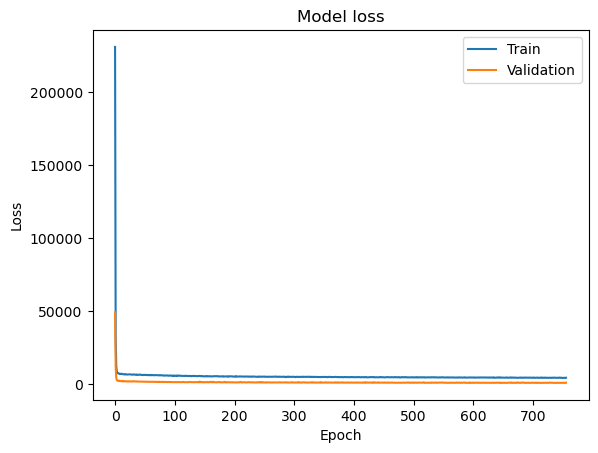

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

#### Making and saving the prediction in a dataframe

In [32]:
x = sc.fit_transform(x)

In [33]:
PREDICTION = model.predict(x)

452/452 [==============================] - 0s 813us/step


In [34]:
OUTPUT = pd.DataFrame(zip(y,PREDICTION), columns=("ACTUAL", "PREDICTION"))
OUTPUT['PREDICTION'] = OUTPUT['PREDICTION'].astype(float)
OUTPUT.head()

,ACTUAL,PREDICTION
0,1095.0,1089.887329
1,1094.0,1089.771484
2,1093.0,1089.601440
3,1092.0,1089.881836
4,1091.0,1088.248901


##### Visualizing the prediction

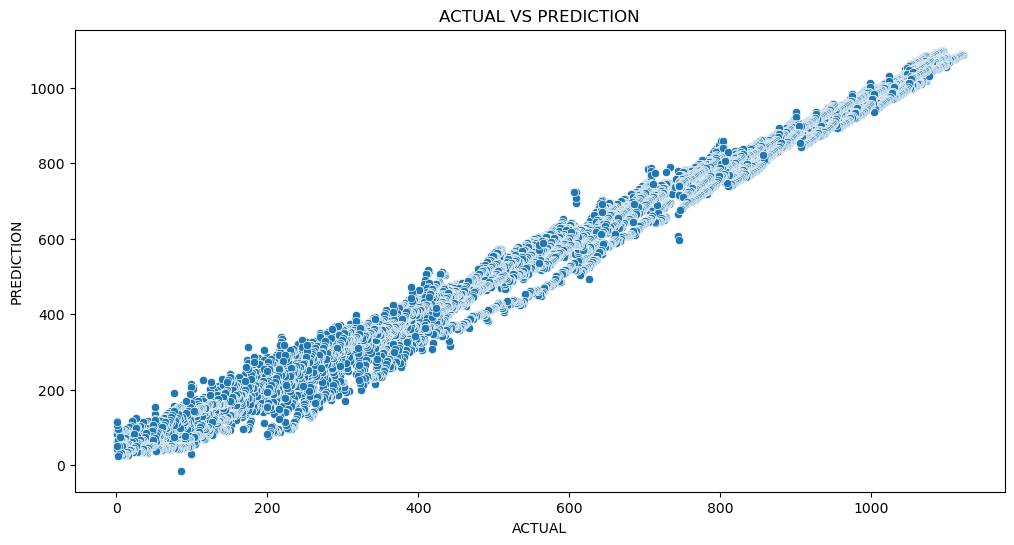

In [35]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION")
plt.title("ACTUAL VS PREDICTION")
plt.show()